#### a. A bar plot:
 Create bar chart that shows the frequency count of audio files for each emotion, with different subfolders represented as different bars for each emotion. The x-axis represents emotions, and the y-axis represents the frequency count. Each emotion has a set of bars representing different subfolders, and the legend shows which subfolder corresponds to each bar.

#### b. A pie chart: 
Create a pie chart that shows the total count of audio files for each emotion. Each emotion is represented as a slice of the pie, and the percentage of total files that each emotion contributes is displayed as labels.

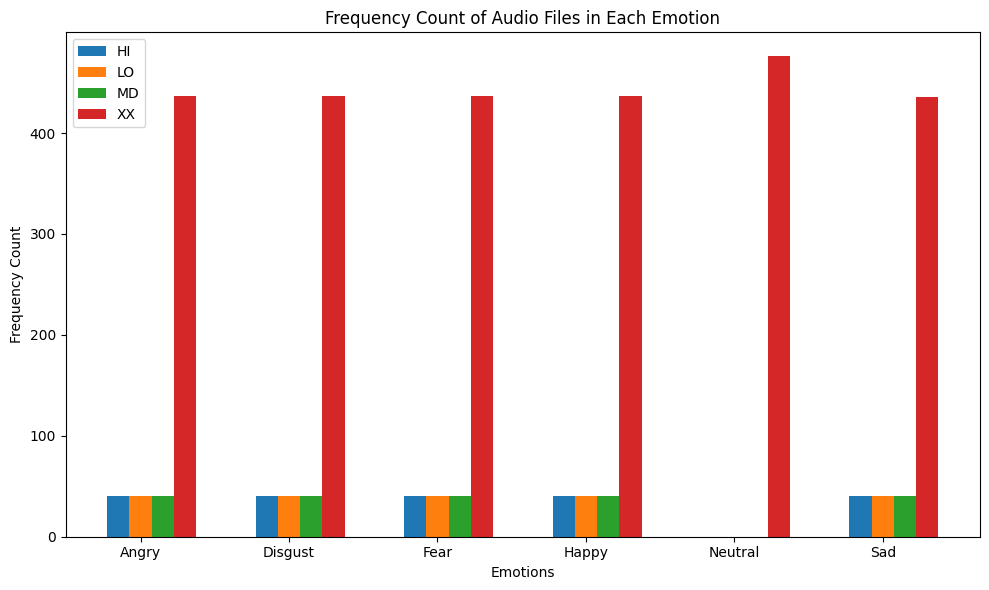

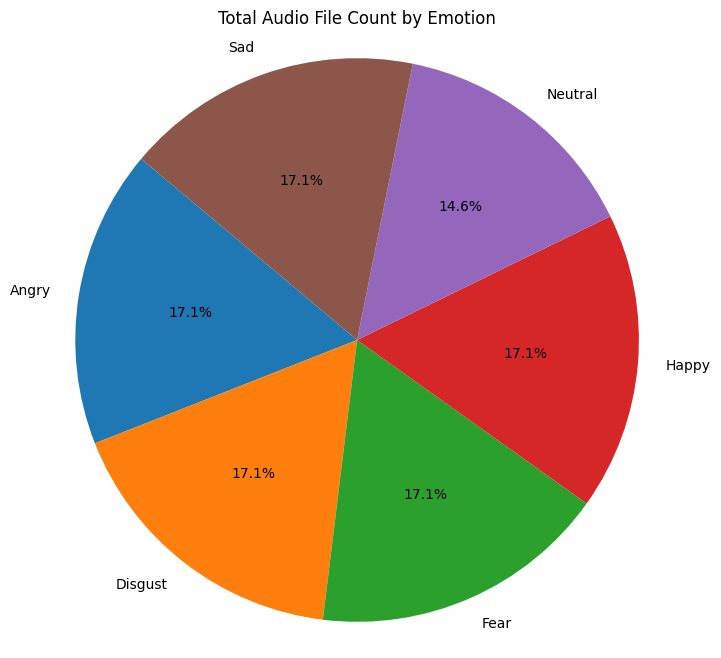

In [37]:
import os
import matplotlib.pyplot as plt

# Define the root directory where your audio files are stored
root_dir = "Audio"

# Define the emotions and subfolders
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']
subfolders = ['HI', 'LO', 'MD', 'XX']

# Function to count audio files in each folder
def count_audio_files(folder_path):
    count = 0
    for filename in os.listdir(folder_path):
        if filename.endswith(".wav"):  # Assuming your audio files are in WAV format
            count += 1
    return count

# Get the counts for each folder
counts = {}
for emotion in emotions:
    counts[emotion] = {}
    for subfolder in subfolders:
        folder_path = os.path.join(root_dir, emotion, subfolder)
        if os.path.exists(folder_path):
            counts[emotion][subfolder] = count_audio_files(folder_path)

# Create a bar plot showing the frequency count
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.15
x = range(len(emotions))

for i, subfolder in enumerate(subfolders):
    subfolder_counts = [counts[emotion].get(subfolder, 0) for emotion in emotions]
    ax.bar([pos + i * width for pos in x], subfolder_counts, width, label=subfolder)

ax.set_xlabel("Emotions")
ax.set_ylabel("Frequency Count")
ax.set_title("Frequency Count of Audio Files in Each Emotion")
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(emotions)
ax.legend(subfolders)
plt.tight_layout()

# Create a pie chart showing the total count for each emotion
total_counts = [sum(counts[emotion].values()) for emotion in emotions]

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(total_counts, labels=emotions, autopct='%1.1f%%', startangle=140)
ax.set_title("Total Audio File Count by Emotion")
plt.axis('equal')

plt.show()


#### Spectrogram:
A spectrogram is a 2D representation of audio signals that shows how the frequencies in the signal change over time.
On the y-axis, you have the frequency components (often in mel scale), and on the x-axis, you have time.
Color intensity represents the amplitude or energy at different frequencies over time.
Insights: Spectrograms can help you visualize frequency content, identify time-localized events, and distinguish different sounds. For example, you can see the harmonics of musical notes, speech patterns, and transient events in audio.
#### Chromagram:
A chromagram is a representation of the 12 different pitch classes in music (e.g., C, C#, D, D#, E, etc.).
It quantifies the presence of musical notes in an audio signal over time.
Each bin in the chromagram represents a different pitch class.
Insights: Chromagrams are useful for music analysis and can help you identify key changes, chord progressions, and melodic patterns in audio.
#### MFCC (Mel-frequency cepstral coefficients):
MFCCs are coefficients representing the short-term power spectrum of an audio signal.
They capture spectral characteristics and are widely used in speech and audio analysis, including speech recognition.
MFCCs are calculated in the mel-frequency scale to mimic the non-linear human perception of sound.
Insights: MFCCs can help identify phonemes, speaker identity, and other audio features. Changes in MFCCs can be indicative of speech content and timbral characteristics.
#### Waveform:
The waveform is a time-domain representation of the audio signal.
It shows how the amplitude of the signal varies with time.
Insights: Waveforms provide a direct view of the audio signal, showing its amplitude variations. They are useful for identifying discontinuities, transient events, and background noise.
#### Time Domain Analysis:
Time-domain analysis includes metrics like zero-crossing rate and root mean square (RMS) energy.
Zero-crossing rate measures how frequently the signal changes polarity (crosses zero) in a given time frame.
RMS energy measures the magnitude of the signal.
Insights: These metrics provide information about signal dynamics and noisiness. High zero-crossing rates may indicate noise or unvoiced speech, while RMS energy can reflect overall loudness.
#### Amplitude Histogram:
An amplitude histogram shows the distribution of amplitude values in the audio signal.
It can help identify the dynamic range and amplitude distribution of the signal.
Insights: By analyzing the amplitude histogram, you can understand how the signal's amplitude is distributed, which can be helpful for assessing signal quality and identifying clipping or saturation.

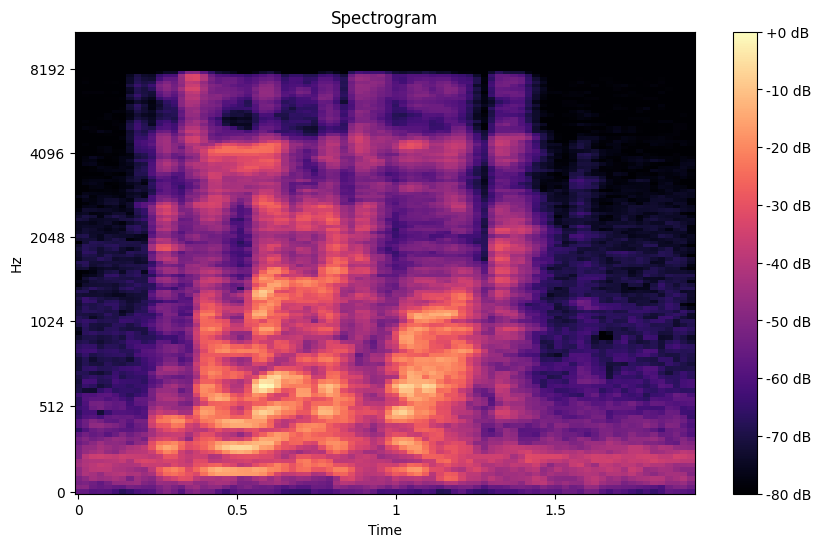

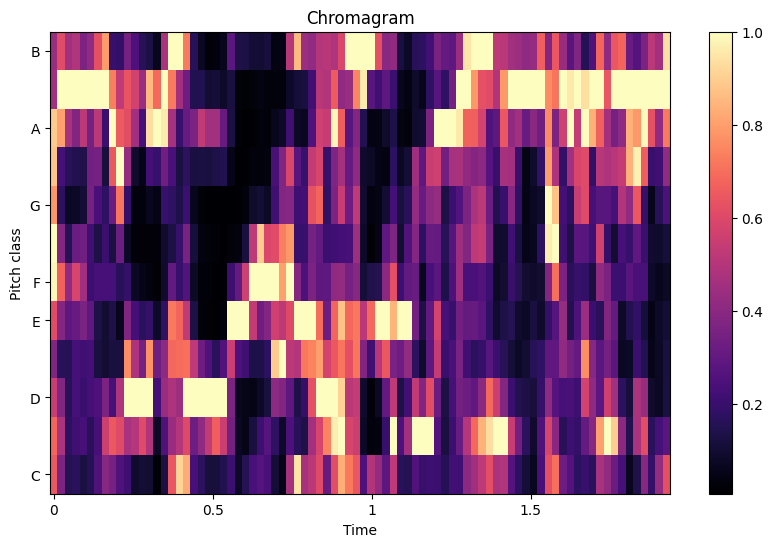

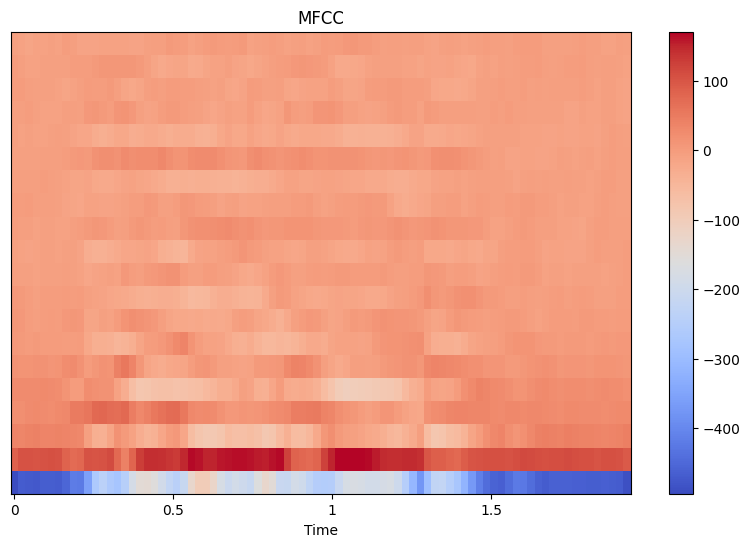

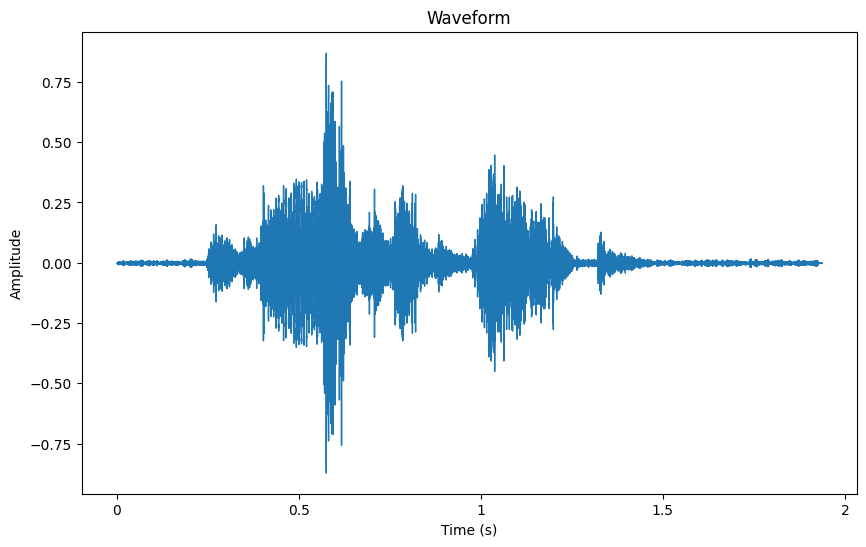

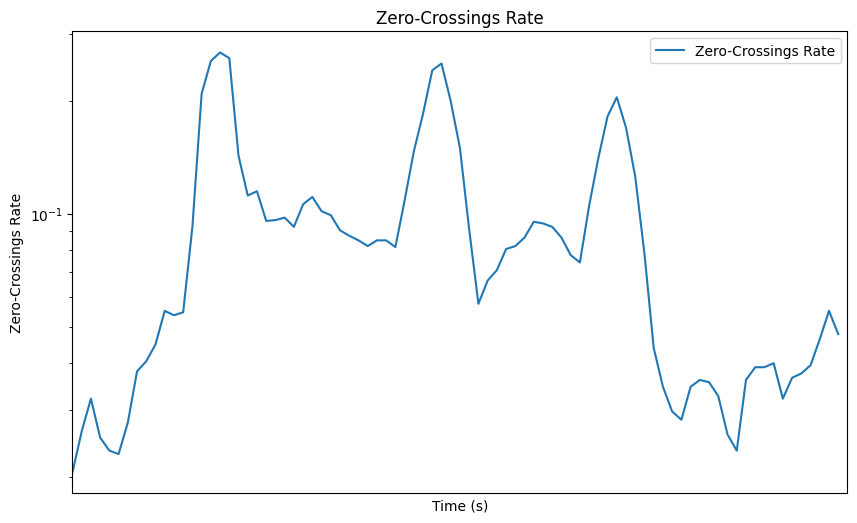

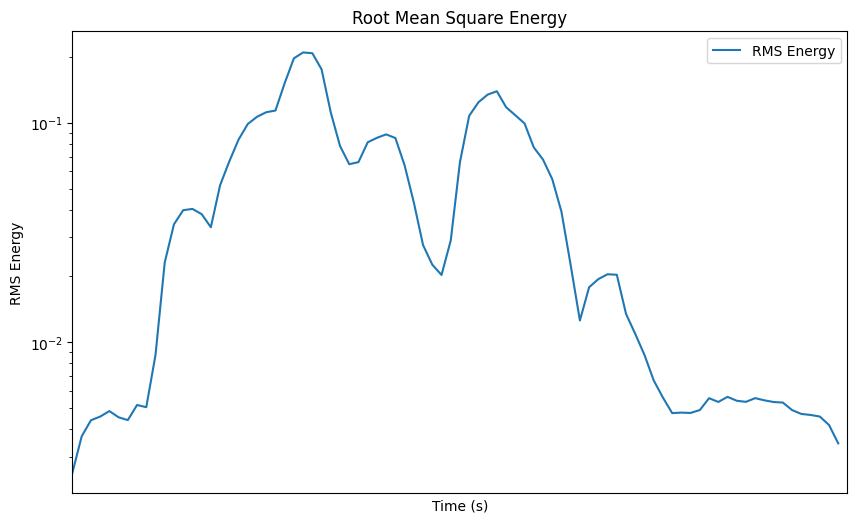

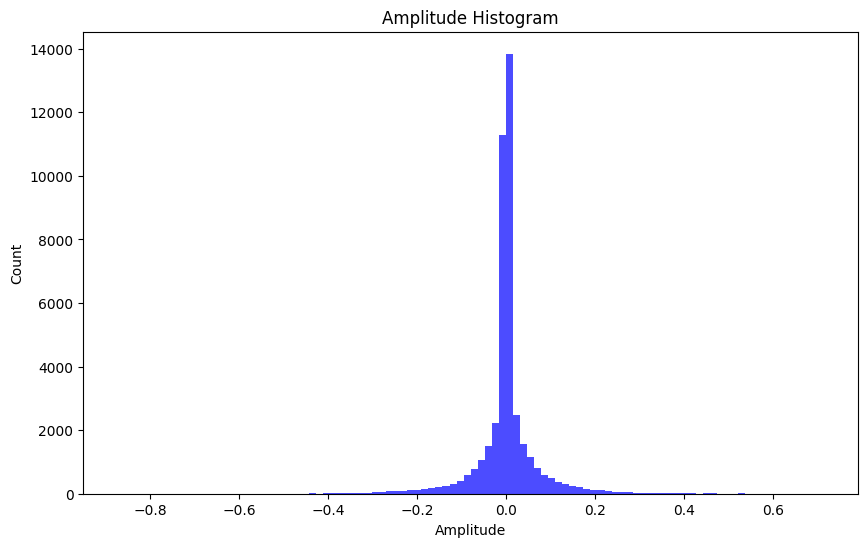

In [42]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio
y, sr = librosa.load("Audio\\Angry\\HI\\1001_IEO_ANG_HI.wav")

# Create a spectrogram
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.show()

# Create a chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(10, 6))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title("Chromagram")
plt.show()

# Create an MFCC plot
mfccs = librosa.feature.mfcc(y=y, sr=sr)
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC")
plt.show()

# Create a waveform plot
plt.figure(figsize=(10, 6))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Calculate zero-crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(y)
plt.figure(figsize=(10, 6))
plt.semilogy(zero_crossings.T, label='Zero-Crossings Rate')
plt.xticks([])
plt.xlim([0, zero_crossings.shape[-1]])
plt.legend()
plt.title("Zero-Crossings Rate")
plt.xlabel("Time (s)")
plt.ylabel("Zero-Crossings Rate")
plt.show()

# Calculate root mean square energy
rmse = librosa.feature.rms(y=y)
plt.figure(figsize=(10, 6))
plt.semilogy(rmse.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rmse.shape[-1]])
plt.legend()
plt.title("Root Mean Square Energy")
plt.xlabel("Time (s)")
plt.ylabel("RMS Energy")
plt.show()

# Create an amplitude histogram
plt.figure(figsize=(10, 6))
plt.hist(y, bins=100, color='b', alpha=0.7)
plt.title("Amplitude Histogram")
plt.xlabel("Amplitude")
plt.ylabel("Count")
plt.show()


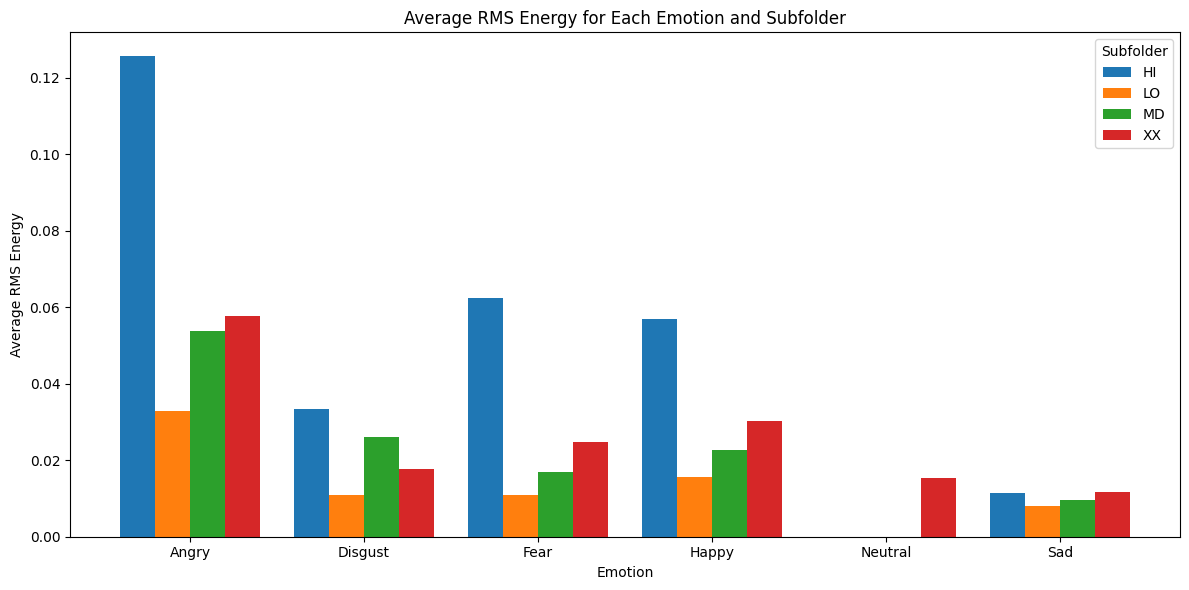

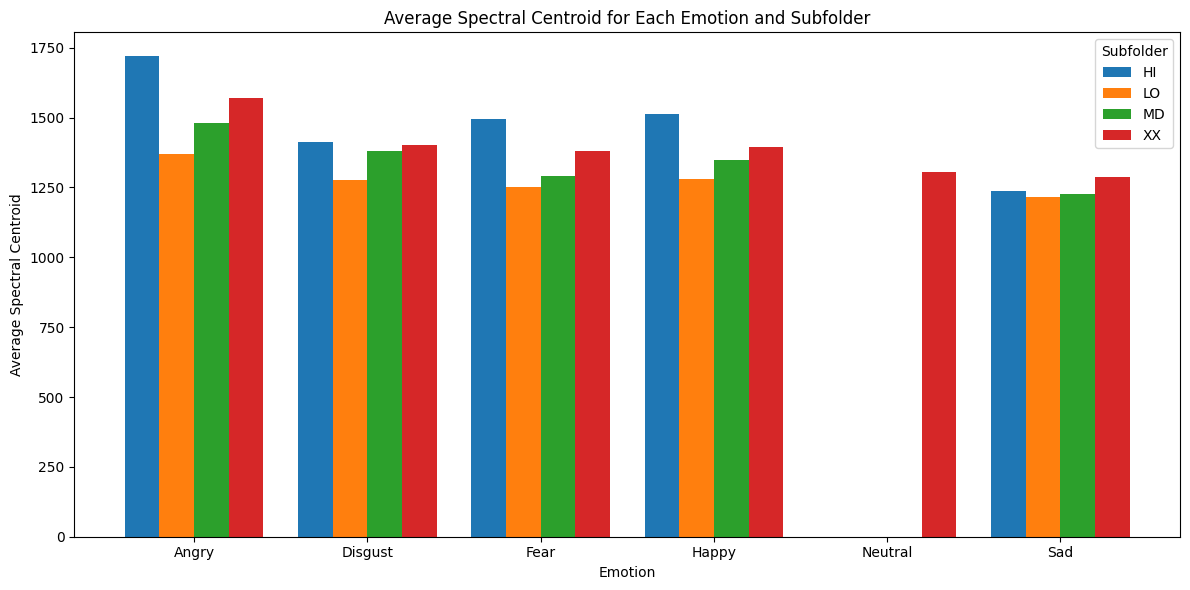

In [51]:
import os
import librosa
import matplotlib.pyplot as plt

root_dir = "Audio"
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']
subfolders = ['HI', 'LO', 'MD', 'XX']

rms_energy_data = {}
spectral_centroid_data = {}

for emotion in emotions:
    for subfolder in subfolders:
        folder_path = os.path.join(root_dir, emotion, subfolder)
        
        # Check if the folder exists
        if not os.path.exists(folder_path):
            continue

        rms_energy_list = []
        spectral_centroid_list = []

        for filename in os.listdir(folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(folder_path, filename)
                y, sr = librosa.load(file_path)

                # Calculate RMS energy
                rms_energy = librosa.feature.rms(y=y)
                rms_energy_list.append(rms_energy.mean())

                # Calculate spectral centroid
                spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
                spectral_centroid_list.append(spectral_centroid.mean())

        # Calculate the average RMS energy and spectral centroid for the subfolder
        avg_rms_energy = sum(rms_energy_list) / len(rms_energy_list)
        avg_spectral_centroid = sum(spectral_centroid_list) / len(spectral_centroid_list)

        # Store the data
        if emotion not in rms_energy_data:
            rms_energy_data[emotion] = {}
            spectral_centroid_data[emotion] = {}
        rms_energy_data[emotion][subfolder] = avg_rms_energy
        spectral_centroid_data[emotion][subfolder] = avg_spectral_centroid

# Plot average RMS energy
plt.figure(figsize=(12, 6))
x = range(len(emotions))
bar_width = 0.2
for i, subfolder in enumerate(subfolders):
    rms_values = [rms_energy_data[emotion].get(subfolder, 0) for emotion in emotions]
    plt.bar([pos + i * bar_width for pos in x], rms_values, bar_width, label=subfolder)

plt.xlabel("Emotion")
plt.ylabel("Average RMS Energy")
plt.title("Average RMS Energy for Each Emotion and Subfolder")
plt.xticks([pos + 1.5 * bar_width for pos in x], emotions)
plt.legend(title="Subfolder")
plt.tight_layout()

# Plot average spectral centroid
plt.figure(figsize=(12, 6))
for i, subfolder in enumerate(subfolders):
    centroid_values = [spectral_centroid_data[emotion].get(subfolder, 0) for emotion in emotions]
    plt.bar([pos + i * bar_width for pos in x], centroid_values, bar_width, label=subfolder)

plt.xlabel("Emotion")
plt.ylabel("Average Spectral Centroid")
plt.title("Average Spectral Centroid for Each Emotion and Subfolder")
plt.xticks([pos + 1.5 * bar_width for pos in x], emotions)
plt.legend(title="Subfolder")
plt.tight_layout()

plt.show()


C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_2928\3993174422.py:109: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


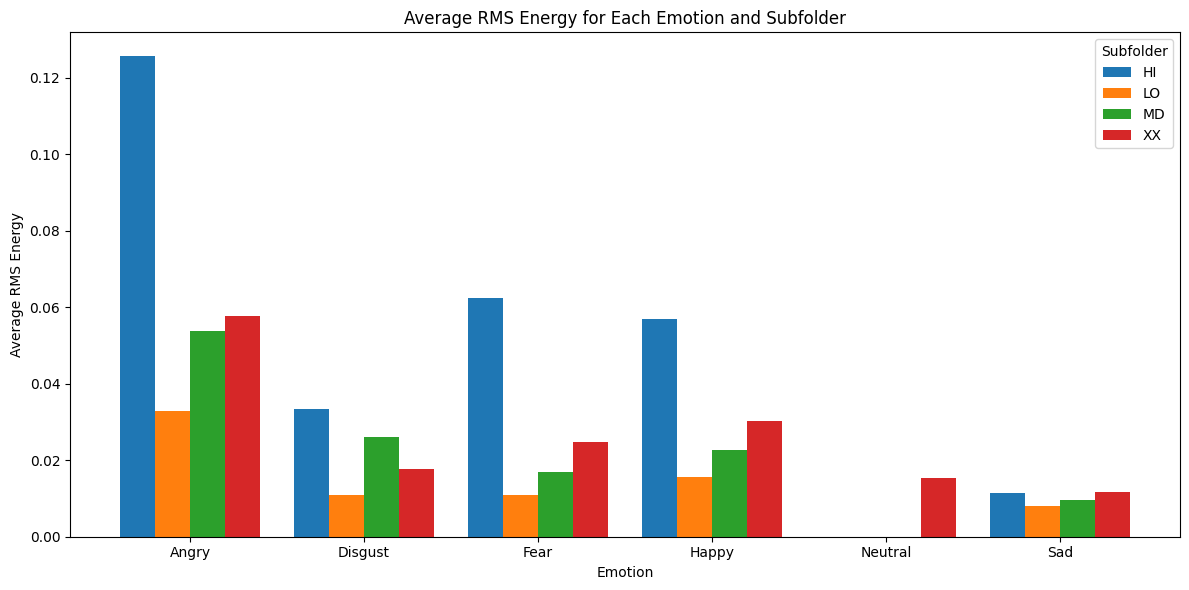

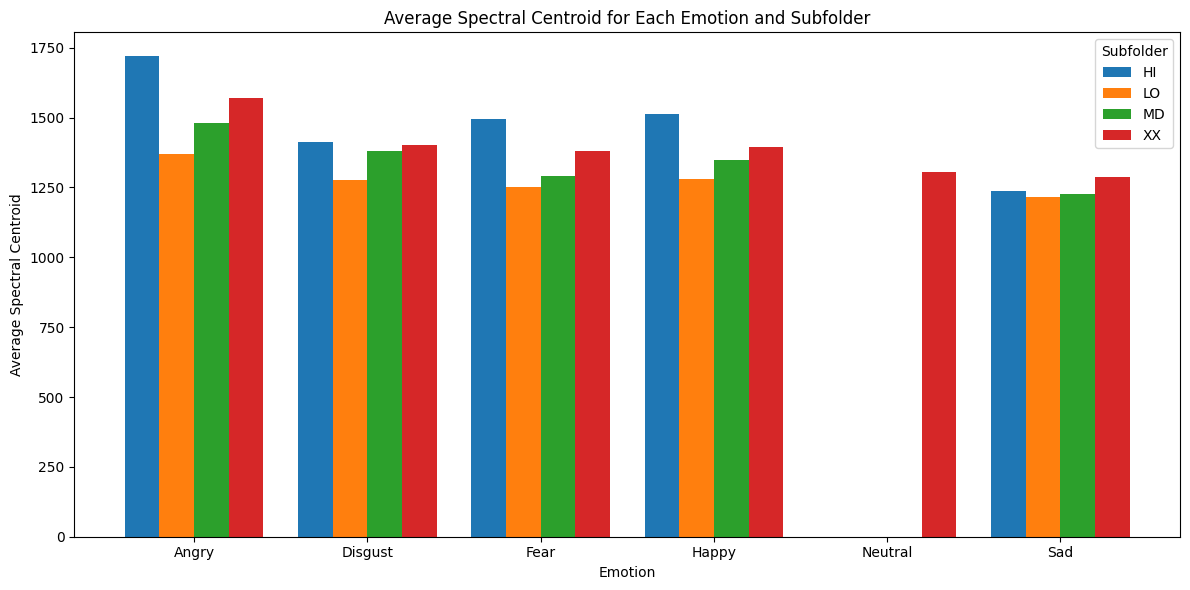

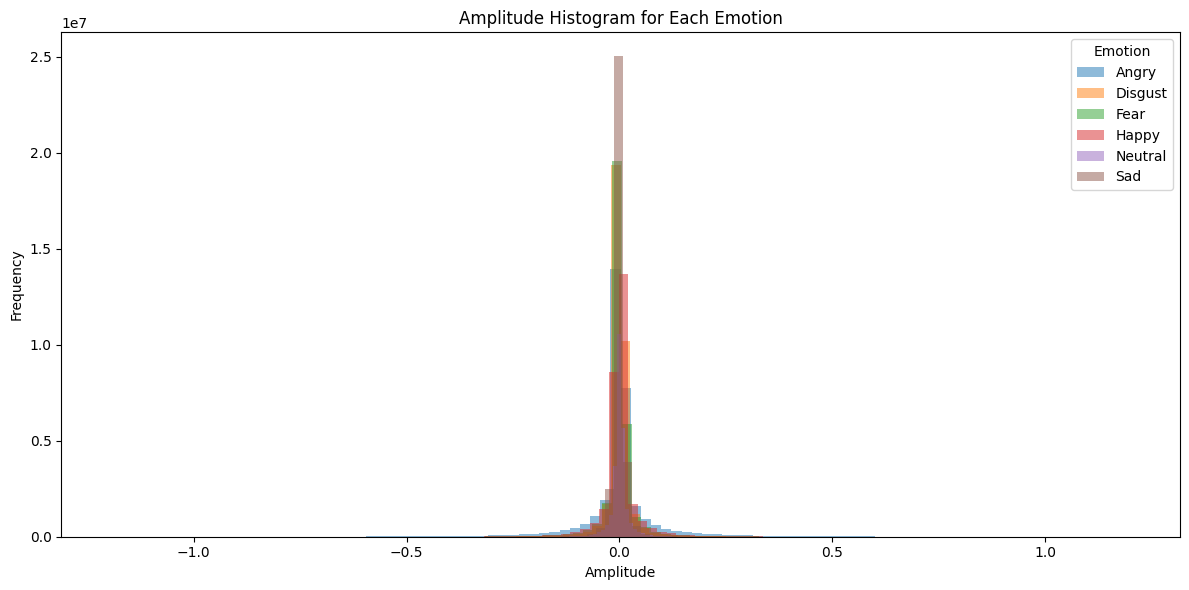

c:\Users\VAIBHAV\PycharmProjects\pythonProject\venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


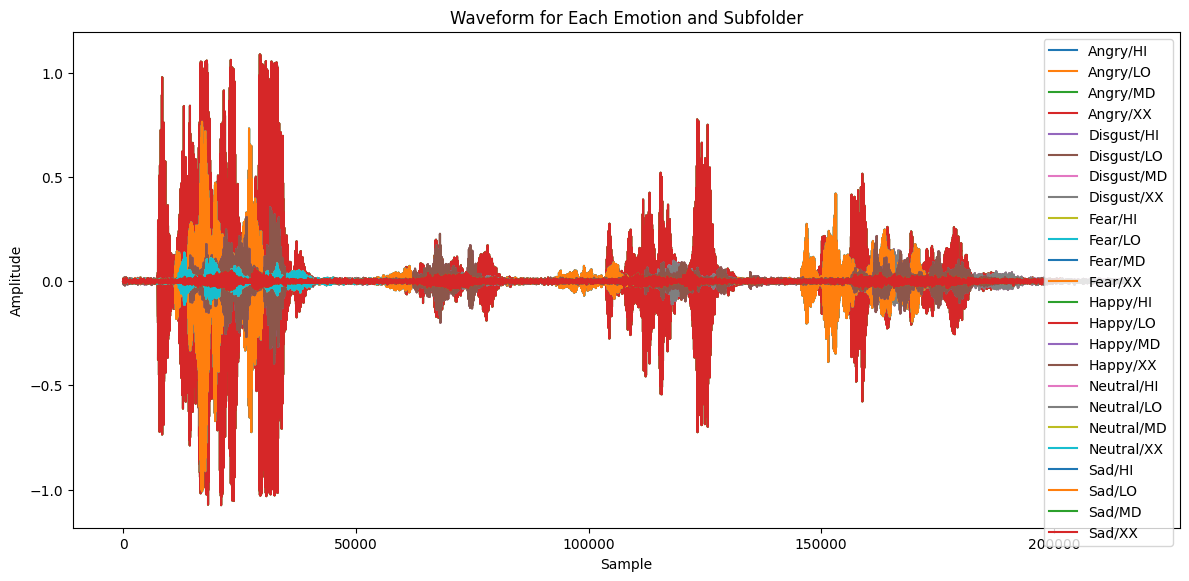

In [52]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

root_dir = "Audio"
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad']
subfolders = ['HI', 'LO', 'MD', 'XX']

rms_energy_data = {}
spectral_centroid_data = {}
amplitude_histogram_data = {}
waveform_data = {}

for emotion in emotions:
    for subfolder in subfolders:
        folder_path = os.path.join(root_dir, emotion, subfolder)
        
        # Check if the folder exists
        if not os.path.exists(folder_path):
            continue

        rms_energy_list = []
        spectral_centroid_list = []
        amplitude_histogram = []

        for filename in os.listdir(folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(folder_path, filename)
                y, sr = librosa.load(file_path)

                # Calculate RMS energy
                rms_energy = librosa.feature.rms(y=y)
                rms_energy_list.append(rms_energy.mean())

                # Calculate spectral centroid
                spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
                spectral_centroid_list.append(spectral_centroid.mean())

                # Calculate amplitude histogram
                amplitude_histogram.extend(y)  # Collect amplitude values

        # Calculate the average RMS energy and spectral centroid for the subfolder
        avg_rms_energy = sum(rms_energy_list) / len(rms_energy_list)
        avg_spectral_centroid = sum(spectral_centroid_list) / len(spectral_centroid_list)

        # Store the data
        if emotion not in rms_energy_data:
            rms_energy_data[emotion] = {}
            spectral_centroid_data[emotion] = {}
            amplitude_histogram_data[emotion] = []
            waveform_data[emotion] = []

        rms_energy_data[emotion][subfolder] = avg_rms_energy
        spectral_centroid_data[emotion][subfolder] = avg_spectral_centroid
        amplitude_histogram_data[emotion].extend(amplitude_histogram)
        waveform_data[emotion].extend(y)

# Plot average RMS energy
plt.figure(figsize=(12, 6))
x = range(len(emotions))
bar_width = 0.2
for i, subfolder in enumerate(subfolders):
    rms_values = [rms_energy_data[emotion].get(subfolder, 0) for emotion in emotions]
    plt.bar([pos + i * bar_width for pos in x], rms_values, bar_width, label=subfolder)

plt.xlabel("Emotion")
plt.ylabel("Average RMS Energy")
plt.title("Average RMS Energy for Each Emotion and Subfolder")
plt.xticks([pos + 1.5 * bar_width for pos in x], emotions)
plt.legend(title="Subfolder")
plt.tight_layout()

# Plot average spectral centroid
plt.figure(figsize=(12, 6))
for i, subfolder in enumerate(subfolders):
    centroid_values = [spectral_centroid_data[emotion].get(subfolder, 0) for emotion in emotions]
    plt.bar([pos + i * bar_width for pos in x], centroid_values, bar_width, label=subfolder)

plt.xlabel("Emotion")
plt.ylabel("Average Spectral Centroid")
plt.title("Average Spectral Centroid for Each Emotion and Subfolder")
plt.xticks([pos + 1.5 * bar_width for pos in x], emotions)
plt.legend(title="Subfolder")
plt.tight_layout()

# Plot amplitude histogram
plt.figure(figsize=(12, 6))
for emotion in emotions:
    plt.hist(amplitude_histogram_data[emotion], bins=100, alpha=0.5, label=emotion)

plt.xlabel("Amplitude")
plt.ylabel("Frequency")
plt.title("Amplitude Histogram for Each Emotion")
plt.legend(title="Emotion")
plt.tight_layout()

# Plot waveform
plt.figure(figsize=(12, 6))
for emotion in emotions:
    for subfolder in subfolders:
        y = waveform_data[emotion]
        plt.plot(y, label=f"{emotion}/{subfolder}")

plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Waveform for Each Emotion and Subfolder")
plt.legend()
plt.tight_layout()

plt.show()
